## Installation

Before you run this notebook you must have you environment set up properly.  

1. Install xtensor-python. If you have a C++14 compliant compiler that should be ok.  
````
conda install -c conda-forge xtensor-python
````

2. Install ipywidgets:  
````
conda install -c conda-forge ipywidgets
````

3. Install numpy and bqplot:  
````
conda install numpy
pip install bqplot
````

4. Install density_scatter:  
Clone [this repo](https://oscar6echo@gitlab.com/oscar6echo/medium-jupyter.git).  
Go inside folder density_scatter.
````
pip install -e .
````

In [1]:
import warnings
warnings.filterwarnings('ignore', module='matplotlib')

import numpy as np
import density_scatter as ds
import bqplot.pyplot as plt
import bqplot as bq
from ipywidgets import HBox, FloatSlider

## Create N random points
+ Each coordinate drawn from a standard normal distribution
+ N coordinates $(x_i, y_i)$ for $i \in \{1,\dots, N\}$ 

In [2]:
N = 30
points = np.random.randn(N, 2)
xmesh = np.linspace(-2., 2.)
ymesh = np.linspace(-2., 2.)
sigma = 0.2
dens = ds.density(xmesh, ymesh, points, sigma)

## Scatter plot these points and their density
+ On a 50x50 grid for coordinates in [-2, 2]x[-2, 2]
+ Density at one point $(x, y)$ is proportional to 
$$\sum_{i=1}^{N}{exp \left( -\frac{\sigma^2}{2}((x-x_i)^2+(y-y_i)^2) \right)} $$

Check out the C++ [source code](https://gitlab.com/oscar6echo/medium-jupyter/blob/master/density_scatter/src/main.cpp) to see the exact formula, and how it is calculated.  

You can drag the random points to see how the density is recalculated accordingly.

In [3]:
def update_density(change):
    dens = ds.density(xmesh, ymesh, np.stack([scat.x, scat.y], axis=1) , slider.value)
    heat.color = dens.T

fig = plt.figure(padding_y=0)

xs = bq.LinearScale(min=-2., max=2.)
ys = bq.LinearScale(min=-2., max=2.)
heat = plt.heatmap(color=dens.T, scales = {"x": xs, "y": ys}, x=xmesh, y=ymesh)
scat = plt.scatter(x=points[:,0],
                   y=points[:,1],
                   scales = {"x": xs, "y": ys},
                   enable_move=True)
scat.observe(update_density, names=['x', 'y'])

slider = FloatSlider(min=0.1, max=2., step=0.1, value=0.1, orientation='vertical', description='sigma')
slider.observe(update_density, names='value')
hb = HBox([fig, slider], layout= {'align_items': 'center'})
hb

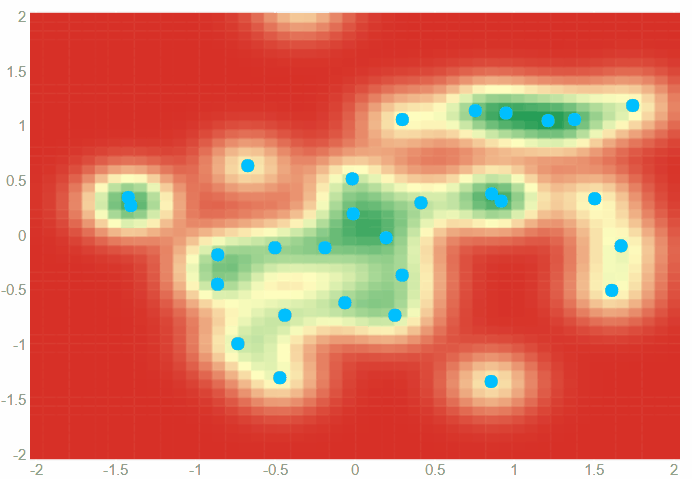

In [4]:
# This is what the widget looks like - in case you have not run the NB yet
import os
from IPython.display import Image
Image(os.path.join('data', 'density.png')) # it is in fact a gif

## Conclusion: Best of 3 worlds: C++, Javascript, Python
This example is interesting because it demonstrate how disconnected languages can integrate in the Jupyter notebook to create a powerful user experience.  

1. The numerical computations are essentially done in compiled C++ (function `ds.density`).  
The source code is in this [main.cpp](https://gitlab.com/oscar6echo/medium-jupyter/blob/master/density_scatter/src/main.cpp).  
It is written with [xtensor](https://github.com/QuantStack/xtensor). See how array operations are made simple by the expressive syntax, à la [Python numpy](http://www.numpy.org/).  

2. The display is done in javascript as the notebook is at its root a web page.  
It uses library [bqplot](https://github.com/bloomberg/bqplot), a Grammar of Graphics-based interactive plotting framework for the Jupyter notebook.  

3. The user interaction is either through a javascript widget or the Python language, convenient for scripting.  